In [71]:
import networkx as nx
import matplotlib.pyplot as plt

In [78]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([('bla1', 'bla2', 0.5), ('bla3', 'bla1', 0.75), ('bla4', 'bla5', 0.5)])

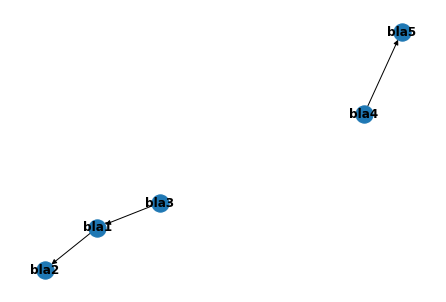

In [79]:
nx.draw(DG, with_labels=True, font_weight='bold')

In [80]:
def filter_graph(graph, node_ids_to_keep, mode='remove'):
    res = graph
    edges_to_keep = []
    
    # find edges to keep - ones pointing to node_ids_to_keep
    for node in node_ids_to_keep:
        edges_to_keep.extend(res.in_edges(node))
    
    # find edges to remove: ones that do not point to nodes_ids_to_keep
    edges_to_remove = set(graph.edges) - set(edges_to_keep)

    # actually remove those edges
    for edge in edges_to_remove:
        res.remove_edge(*edge)

    # find nodes with no in/out edges (0 edges)
    nodes_to_remove = [node_id for (node_id, degree) in res.degree() if degree == 0]
    
    # actually remove those nodes
    for node_id in nodes_to_remove:
        res.remove_node(node_id)

    return res

In [82]:
DG_filt = filter_graph(DG, ['bla1'])

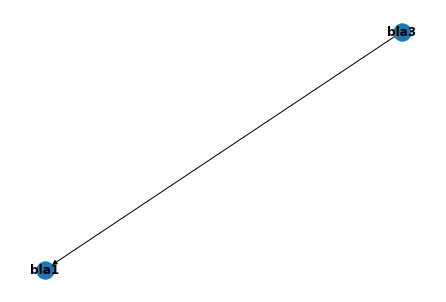

In [83]:
nx.draw(DG_filt, with_labels=True, font_weight='bold')